In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
data_init = pd.read_csv("s3://full-stack-bigdata-datasets/Machine Learning Supervisé/Projet Conversion Rate/conversion_data.csv")

In [4]:
conversion = data_init.copy()

#  Introduction 
- The goal of this exercise is to train ML classifiers to predict whether customers of a ecommerce website will convert or not
- We are doing this exercise to practice ML classification as well as data visualisation

# Data Exploration 

## Preliminary steps
<br>


In [5]:
conversion.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [6]:
conversion.describe(include= "all") 

,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [7]:
conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [8]:
conversion.corr()

,age,new_user,total_pages_visited,converted
age,1.000000,0.012343,-0.045922,-0.088797
new_user,0.012343,1.000000,-0.082541,-0.152374
total_pages_visited,-0.045922,-0.082541,1.000000,0.528994
converted,-0.088797,-0.152374,0.528994,1.000000


###  Preliminary descriptions show the following: 
- No missing values for each column 
- Some columns are categorical and will need processing (new_user, country, source) 
- Quant columns will need to be standardized 
- The age column will need to be explored further --> highly unlikely that somebeody 123 actually used the website (dirty data) 
- Around 316k inputs which should be enough to derive a decent model
- Seems to be a decent correltion b/w pages visited and conversion success
 <br>
 <br>
 






### Further exploration and data visualisation
<br>

In [9]:
 # def function to show return table with count of unique values of a series 
def show_unique_count(df_name, column_name, digits = 2):
    
    count = df_name[column_name].value_counts(dropna=False)
    percentage = (df_name[column_name].value_counts \
                      (dropna=False, normalize=True) \
                      *100).round(digits)
    table = pd.concat([count,percentage],\
                    axis=1,\
                    keys=['counts', '%'])
    return(table)


In [10]:
show_unique_count(conversion, "country")

,counts,%
US,178092,56.32
China,76602,24.23
UK,48450,15.32
Germany,13056,4.13


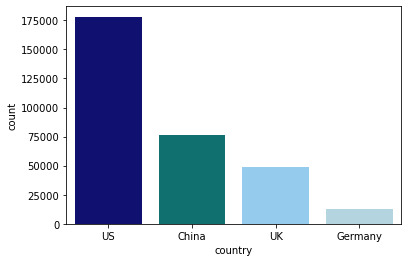

In [11]:
# visualize the information 
palette = ['navy', 'teal', 'lightskyblue', "lightblue"]
sns.countplot(conversion['country'], order = conversion['country'].value_counts().index, palette =palette )

### Does conversion rate vary per country? 

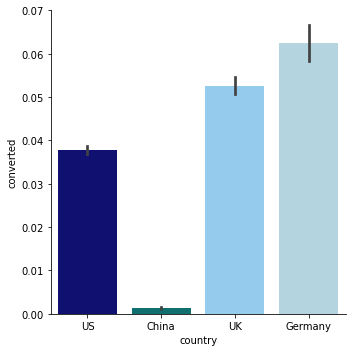

In [12]:
cat_order = ["US", "China", "UK", "Germany"]
palette = ['navy', 'teal', 'lightskyblue', "lightblue"]

sns.catplot(x="country", y="converted", kind="bar", data=conversion, order = cat_order, palette = palette)



### There seems to be a difference in conversion rates per country,
- Germany has highgest conversion rate of around 6.5% 
- UK follows suit
- China is very low and US is around 4%
- We also notice that the less visitors a country has, the highest their conversion rate seems to be (except for china) 

However there is little we can derive from this --> let's find out if there are other differences in countries that might influence the conversion rate. 

### Fist, we can look at the SEO categories

<br>

In [13]:
### create table with percerntages and count for each source
count_source = conversion["source"].value_counts(dropna=False)
percentage_source = (conversion["source"].value_counts\
                     (dropna=False, normalize=True)\
                     *100).round(1)

source = pd.concat([count_source,percentage_source],\
                   axis=1, \
                   keys=['counts', '%'])
source


,counts,%
Seo,155040,49.0
Ads,88740,28.1
Direct,72420,22.9


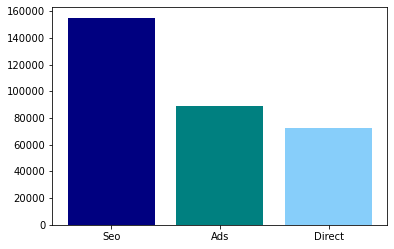

In [14]:
# let's practice matplolib and use it to plot the bar chat of seo categories
palette = ['navy', 'teal', 'lightskyblue', "lightblue"]
plt.bar(conversion["source"].value_counts().index, conversion["source"].value_counts(), color = palette)
plt.show()

###  Let's see if there is a difference of conversion rate per source ? 


<function seaborn.categorical.catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7fe2165d8a60>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

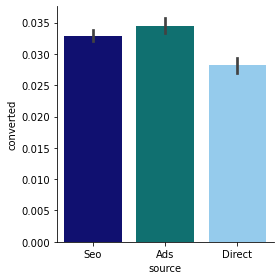

In [15]:
cat_order = ["Seo", "Ads", "Direct"]
palette = ['navy', 'teal', 'lightskyblue', "lightblue"]

sns.catplot(x="source", y="converted", kind="bar", data=conversion, order = cat_order, palette = palette, height = 4)

sns.catplot

In [16]:
conversion.groupby('source')["converted"].value_counts(normalize=True)


source  converted
Ads     0            0.965517
        1            0.034483
Direct  0            0.971831
        1            0.028169
Seo     0            0.967105
        1            0.032895
Name: converted, dtype: float64

#### Ads seem to perform slightly better than the rest but the difference is minimal
### What if we look at both source and country? 
<br>

In [21]:

perc= (conversion.groupby(["country"])["source"].\
value_counts(normalize=True)*100).round(1).unstack(["source"]) #let's prepare a df to plot what we need

In [22]:
values = conversion.groupby(["country"])["source"].\
value_counts().unstack(["source"]) 


In [24]:
table = pd.concat([perc,values],\
                    axis=1,\
                    keys=['counts', '%'])
table


counts                   %              
source     Ads Direct   Seo    Ads Direct    Seo
country                                         
China     28.1   22.8  49.1  21561  17463  37578
Germany   28.8   21.9  49.3   3760   2864   6432
UK        27.9   23.0  49.1  13518  11131  23801
US        28.0   23.0  49.0  49901  40962  87229

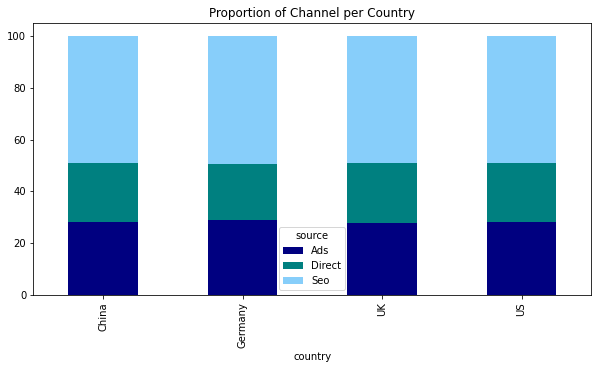

In [25]:
### let's plot the percentages
perc.plot(kind='bar', \
        stacked=True, \
        color = palette, title = "Proportion of Channel per Country", \
        figsize = (10,5))

 #### There seems to be an even distribution of channels per country. 
 
 ### Can we go one step further and see if the conversion per channel varies per country? 
 Let's give it a try! 
 <br>

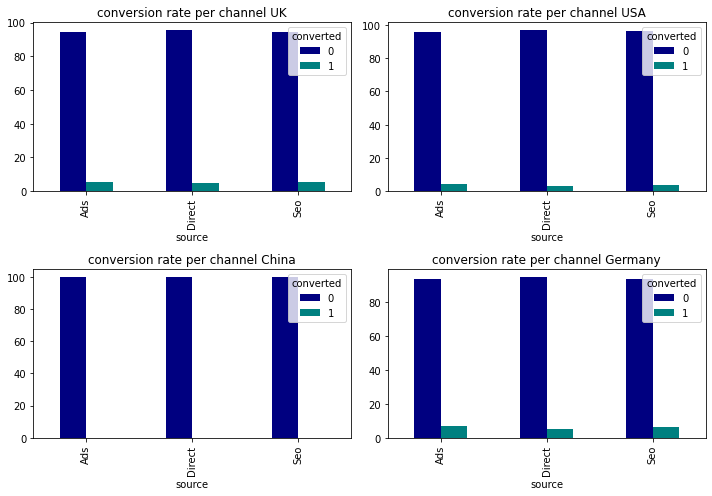

UK
converted     0    1
source              
Ads        94.4  5.6
Direct     95.4  4.6
Seo        94.6  5.4
--------------------------------------------
US
converted     0    1
source              
Ads        95.9  4.1
Direct     96.7  3.3
Seo        96.1  3.9
--------------------------------------------
China
converted     0    1
source              
Ads        99.9  0.1
Direct     99.9  0.1
Seo        99.9  0.1
--------------------------------------------
Germany
converted     0    1
source              
Ads        93.3  6.7
Direct     94.7  5.3
Seo        93.6  6.4
--------------------------------------------


In [26]:


# Creation of data for a bar chart
df_UK = (conversion[conversion["country"]=="UK"] \
                                            .groupby(["source"])["converted"]. \
                                            value_counts(normalize=True)*100).round(1). \
                                            unstack(["converted"]) 
df_US = (conversion[conversion["country"]=="US"] \
                                            .groupby(["source"])["converted"]. \
                                            value_counts(normalize=True)*100).round(1). \
                                            unstack(["converted"])
df_China = (conversion[conversion["country"]=="China"] \
                                            .groupby(["source"])["converted"]. \
                                            value_counts(normalize=True)*100).round(1). \
                                            unstack(["converted"]) 
df_Germany = (conversion[conversion["country"]=="Germany"] \
                                            .groupby(["source"])["converted"]. \
                                            value_counts(normalize=True)*100).round(1). \
                                            unstack(["converted"]) 


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10, 7))  # 2 row, 2 columns



## UK
df_UK.plot(kind='bar', \
        stacked=False, \
        color = palette,\
        title = "conversion rate per channel UK", \
        ax = ax1 \
         )

## US
df_US.plot(kind='bar', \
        stacked=False, \
        color = palette,\
        title = "conversion rate per channel USA", \
        ax = ax2 \
        )
        

## China
df_China.plot(kind='bar', \
        stacked=False, \
        color = palette,\
        title = "conversion rate per channel China", \
        ax = ax3
         )

## Germany
df_Germany.plot(kind='bar', \
        stacked=False, \
        color = palette,\
        title = "conversion rate per channel Germany", \
        ax = ax4, \
         )

plt.tight_layout()
plt.show()

print("UK")
print(df_UK)
print("--------------------------------------------")

print("US")
print(df_US)
print("--------------------------------------------")

print("China")
print(df_China)
print("--------------------------------------------")

print("Germany")
print(df_Germany)
print("--------------------------------------------")

 Each channel seems to have similar conversion rates distribution per country, except for China  where the conversion is so low anyway that it is hard to interpret the data. 
### Now, lets look at new user categories. Do new users influence conversion? 

In [27]:

### create table with percentages and count for each new_user
show_unique_count(conversion, "new_user")


,counts,%
1,216744,68.55
0,99456,31.45


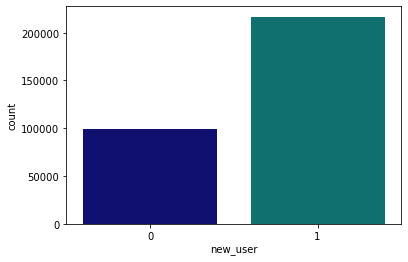

In [28]:
sns.countplot(conversion['new_user'], palette =palette)

Seems like most users are new! 
### Let's see if there is a relationship between new users and conversion rate

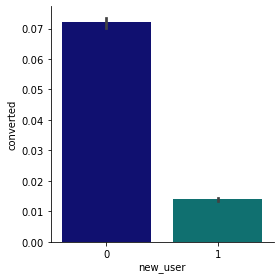

In [29]:
palette = ['navy', 'teal', 'lightskyblue', "lightblue"]
sns.catplot(x="new_user", y="converted", kind="bar", data=conversion, palette = palette, height = 4)


In [30]:
print("Conversion Rate per User Type")
(conversion.groupby("new_user")["converted"].value_counts(normalize= True)*100).round(2)

Conversion Rate per User Type


new_user  converted
0         0            92.8
          1             7.2
1         0            98.6
          1             1.4
Name: converted, dtype: float64

### interesting... existing users seem to be 6.5 times more likely to convert compared to new users
Let's see if the country influences whether a user is new or not

In [31]:

country_new_users = (conversion.groupby("country")["new_user"].value_counts(normalize=True)*100).round(1)
country_new_users

country  new_user
China    1           69.9
         0           30.1
Germany  1           67.7
         0           32.3
UK       1           68.0
         0           32.0
US       1           68.2
         0           31.8
Name: new_user, dtype: float64

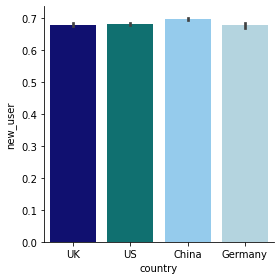

In [32]:
sns.catplot(x="country", y="new_user", kind="bar", data=conversion, palette = palette, height = 4)


### Each country seems to have roughly the same percentage of new users
what if we look at the source? 
<br>

In [33]:
# let's look at the data
source_conversion = (conversion.groupby("source")["new_user"].value_counts(normalize= True)*100).round(1)
source_conversion

source  new_user
Ads     1           68.6
        0           31.4
Direct  1           68.7
        0           31.3
Seo     1           68.5
        0           31.5
Name: new_user, dtype: float64

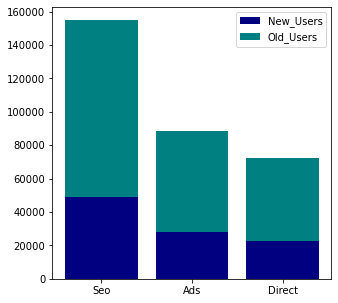

In [34]:
source_new_users= conversion[conversion["new_user"] == 1]['source'].value_counts()
source_old_users = conversion[conversion["new_user"] == 0]['source'].value_counts()
source_names = source_new_users.index


# Create Barplot
plt.figure(figsize=(5,5)) 
plt.bar(source_names, source_new_users, color = ["navy"])
plt.bar(source_names, source_new_users, bottom=source_old_users, color=["teal"])
plt.legend(["New_Users", "Old_Users"]) # Creation of legends
plt.show()




Most channels seem to have a similar proportion of new and old users linked to them
### Now, let's look at the quantiative variables, what can we learn about age? 

In [35]:
conversion["age"].describe()

count    316200.000000
mean         30.569858
std           8.271802
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max         123.000000
Name: age, dtype: float64

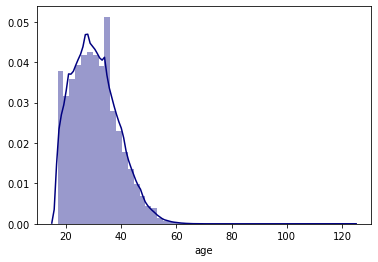

In [36]:
# let's plot the age to have more clarity on it 
sns.distplot(conversion['age'], color = "navy")

#### After first glance, there is a long tail of older people, that is probably made of dirty data. 
#### It would be worth it to limit the age max to around 80 for our model

### What if we look at age according to conversion rate? 

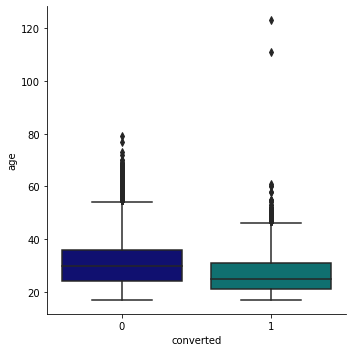

In [37]:
sns.catplot(x='converted', y='age', data=conversion, kind='box', palette = palette)


In [38]:
conversion[conversion["converted"]==0]["age"].describe()

count    306000.000000
mean         30.703961
std           8.275779
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max          79.000000
Name: age, dtype: float64

In [39]:
conversion[conversion["converted"]==1]["age"].describe()

count    10200.000000
mean        26.546765
std          7.051849
min         17.000000
25%         21.000000
50%         25.000000
75%         31.000000
max        123.000000
Name: age, dtype: float64

It seems that younger people seem to convert better than older people. 
Converted crowd has a a median age of 25 compated to 30 for non converted. 
Diff in mean is similar. 

### Are ages distributed evenly accross channels and countries? 

#### Let's look at countries first 

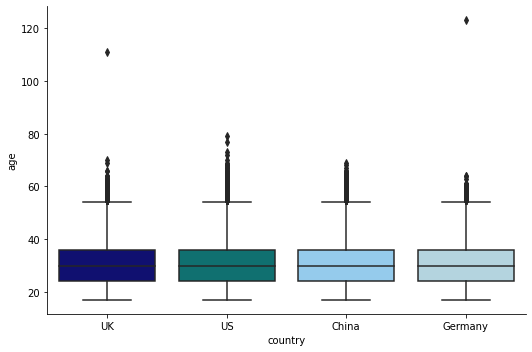

In [40]:
# let's look at countries
sns.catplot(x='country', y='age', data=conversion, kind='box', aspect = 1.5, palette = palette)


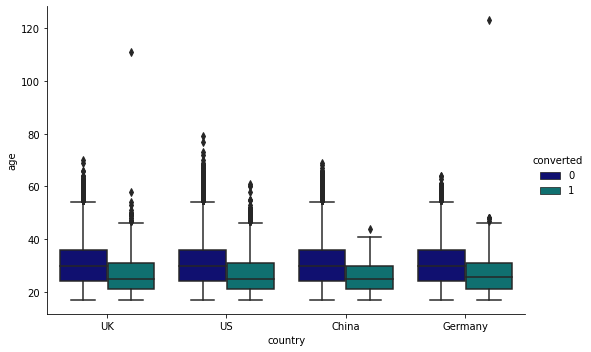

In [41]:
sns.catplot(x='country', y='age', data=conversion, hue= "converted", kind='box', aspect = 1.5, palette = palette)

### Now let's look at channels

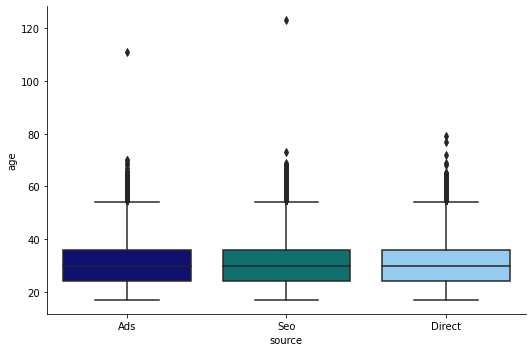

In [42]:
sns.catplot(x='source', y='age', data=conversion, kind='box', aspect = 1.5, palette = palette)

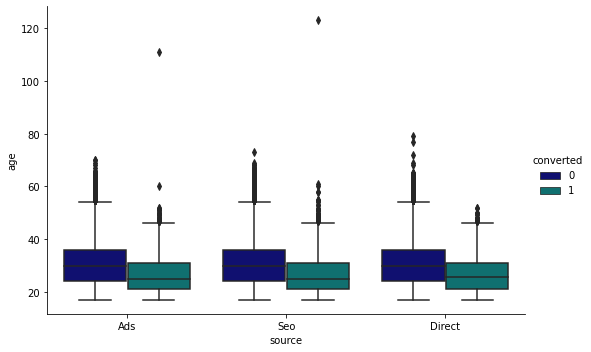

In [43]:
sns.catplot(x='source', y='age', data=conversion, hue="converted", kind='box', aspect = 1.5, palette = palette)

Seems like the trend we have identified is consistent along both channels and countries 
### Let's see if we can plot a quick logarithmic regression b/w age and conversion rate

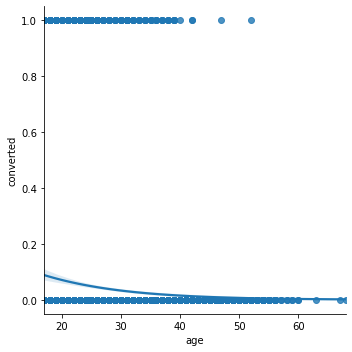

In [44]:
sample = conversion.sample(n=5000)
sns.lmplot(x="age", y="converted", data=sample, logistic=True)


Nothing very obvious here. 
### Finally, let's look at the other category we are interested in --> Pages visited 

In [45]:
conversion["total_pages_visited"].describe()

count    316200.000000
mean          4.872966
std           3.341104
min           1.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          29.000000
Name: total_pages_visited, dtype: float64

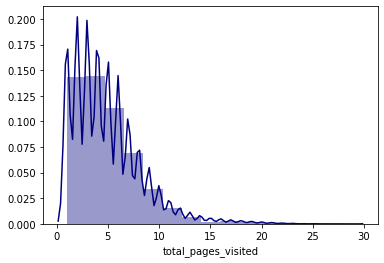

In [46]:
sns.distplot(conversion['total_pages_visited'], color = "navy", bins=15)

interesting, this seems to vary not in a uniform way. Probably because those that convert tend to follow a certain path, so they will visit an n number of pages (checkout, payment, confirmation, basket etc) 
Seems to be a pattern here. 

### What if we look at pages visited  to conversion rate? 

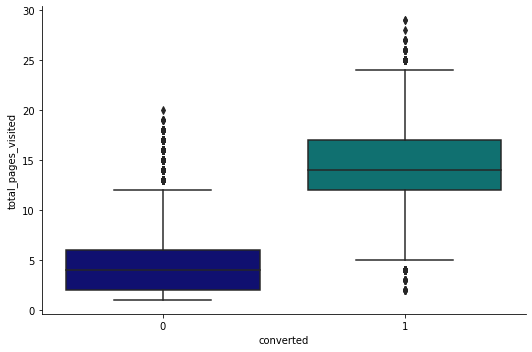

In [47]:
sns.catplot(x='converted', y='total_pages_visited', data=conversion, kind='box', aspect = 1.5, palette = palette)


In [48]:
# distribution of visited pages for those that did not convert
conversion[conversion["converted"]==0]["total_pages_visited"].describe()

count    306000.000000
mean          4.550281
std           2.789910
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          20.000000
Name: total_pages_visited, dtype: float64

In [49]:
# distribution of visited pages for those that did convert

conversion[conversion["converted"]==1]["total_pages_visited"].describe()

count    10200.000000
mean        14.553529
std          3.963392
min          2.000000
25%         12.000000
50%         14.000000
75%         17.000000
max         29.000000
Name: total_pages_visited, dtype: float64

In [50]:
#let's plot the distribution of pages visited into converted and not converted 
converted = conversion[conversion["converted"]==1]
not_converted = conversion[conversion["converted"]==0]


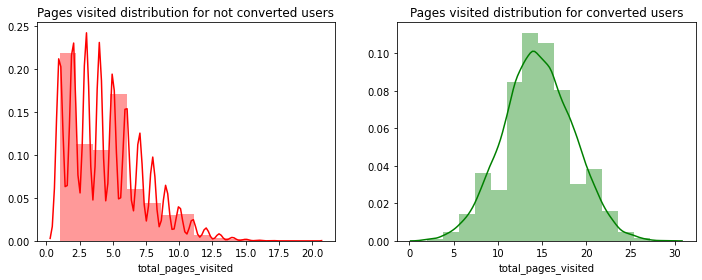

In [51]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4))  

ax1.set_title('Pages visited distribution for not converted users')
ax2.set_title('Pages visited distribution for converted users')

sns.distplot(not_converted['total_pages_visited'], color = "red", bins=15, ax=ax1)
sns.distplot(converted['total_pages_visited'], color = "green", bins=15, ax=ax2)
      
plt.tight_layout()
plt.show()


### Clearly, we can see that those that convert tend to visit more pages, and most importantly, in a more uniform fashion
### Are visited pages evenly distributed accross countries and sources? 

#### Let's look at countries first 

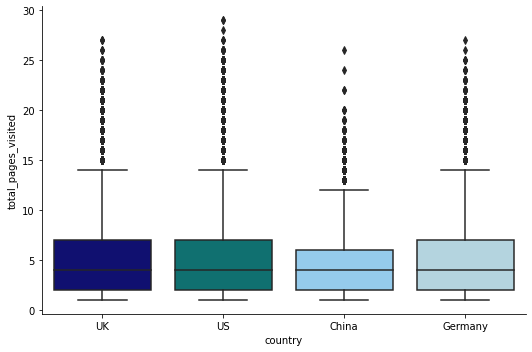

In [52]:
sns.catplot(x='country', y='total_pages_visited', data=conversion, kind='box', aspect = 1.5, palette = palette)


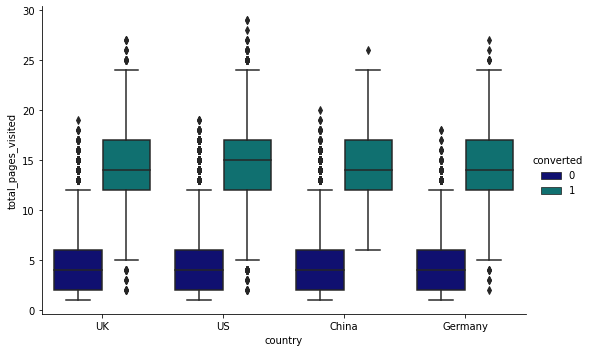

In [44]:
sns.catplot(x='country', y='total_pages_visited', data=conversion, hue="converted", kind='box', aspect = 1.5, palette = palette)


### Let's look at channels now

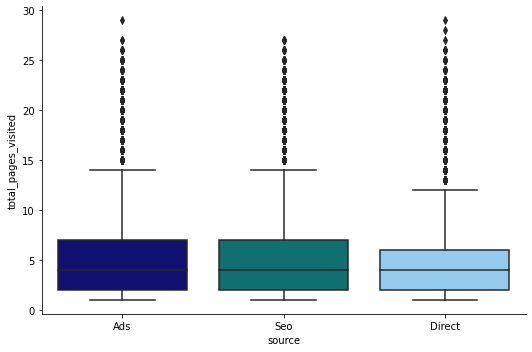

In [53]:
sns.catplot(x='source', y='total_pages_visited', data=conversion, kind='box', aspect = 1.5, palette = palette)


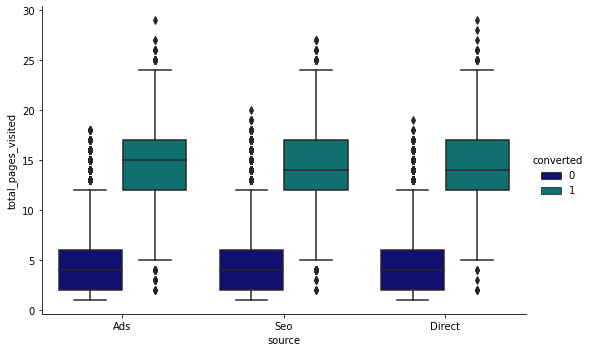

In [54]:
sns.catplot(x='source', y='total_pages_visited', data=conversion, hue="converted", kind='box', aspect = 1.5, palette = palette)


### Seems to be the case that they are evenly distributed among both countries and sources. 
### Now let's see if we can plot a quick logistic regression graph of the pages visited vs converted categories

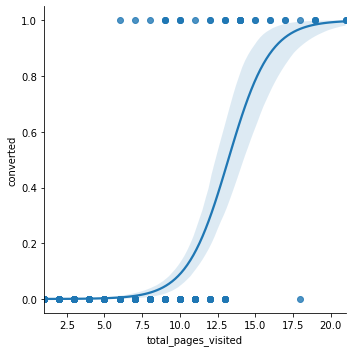

In [46]:
sample = conversion.sample(n=1000)
sns.lmplot(x="total_pages_visited", y="converted", data=sample, logistic=True)

## Bingo! We have a nice S curve!
### Now let's try to plot conversion according to age and total pages visited 

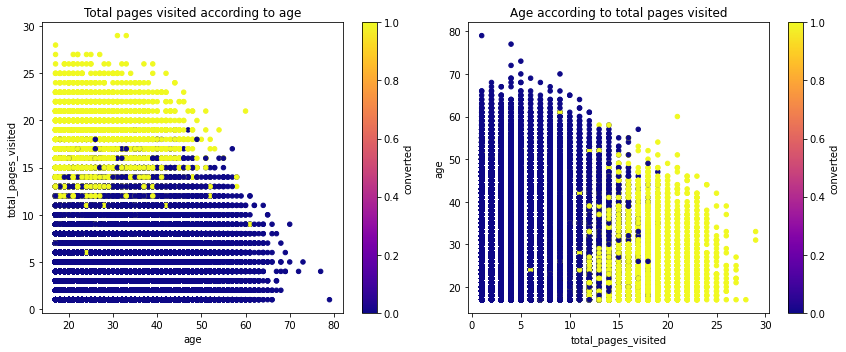

In [55]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 5))  

conversion[conversion["age"]<80].plot \
(kind = "scatter",\
 x="age", \
 y="total_pages_visited", \
 c = "converted", \
 colormap = "plasma",
 title ="Total pages visited according to age", \
colorbar= True, \
ax = ax1)

conversion[conversion["age"]<80].plot \
(kind = "scatter",\
 x="total_pages_visited", \
 y="age", \
 c = "converted", \
 colormap = "plasma", \
 colorbar= True, \
 title="Age according to total pages visited", \
 ax = ax2)
                            

      
plt.tight_layout()
plt.show()

#  Conclusion for Data Exploration 

#### We made a lot of visualisations, some of them not so useful, but it was good practice.

### Key takeways are
- China is the country that converts the least users 
- There is a uniform distribution of conversion per channel 
- There seems to be way more new users in the dataset, but old users actually convert better 
- There is roughly the same percentage of old and new users per country 
- Each country has a similar percentage of channels as well 
- There is a similar percentage of old and new users per channel 
- User age and page visited have the same distribution accross country and channel 
- Pages visited seems to correlate strongly with conversion --> the more pages they visit, the more they converge 
- Age seems to correlate with conversion --> younger people tend to convert better
- We can also influence that the country has an influence on conversion rate, since the conversion rate varies per country but all other metrics are roughly the same in each country


### Now let's build some models! 

#  Model Construction 

Since this is a classification issue, we want to build a simple regression model


##  Logistic Regression Modelling  

Since this is a classification issue, we want to start by building a simple regression model


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


## Pre Processing our Data
#### Here is what we will want to do 
- Outliers --> filer out all ages not within 3 standard deviations
- Outliers --> perhaps drop all those that visited the website only once,as they will likely never convert
- Quant variables (source, total pages_visited) --> standardize 
- Cat variables --> (country, new_user, source) --> one hot encode


In [57]:
print("conversion rate for those that visit only 1 page")
conversion[conversion["total_pages_visited"]==1]["converted"].value_counts()

conversion rate for those that visit only 1 page


0    40739
Name: converted, dtype: int64

### Filtering out those that only visited once will remove quite a few inputs but it's worth it. None of them converted! 

In [58]:
## filtering out those that visited only one page
conversion_clean = conversion[(conversion["total_pages_visited"]>1)]

In [59]:
# take out all those ages that are not within 3 stds of the age. 
conversion_clean = conversion_clean[(conversion_clean["age"]. \
                                     abs()-conversion_clean["age"]. \
                                     mean()) <= \
                                    (3*conversion_clean["age"].std())]

In [60]:
conversion_clean.describe()

,age,new_user,total_pages_visited,converted
count,274451.000000,274451.000000,274451.000000,274451.000000
mean,30.445205,0.682778,5.446765,0.037140
std,8.106045,0.465396,3.206118,0.189104
min,17.000000,0.000000,2.000000,0.000000
25%,24.000000,0.000000,3.000000,0.000000
50%,30.000000,1.000000,5.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,55.000000,1.000000,29.000000,1.000000


### Separate X and y

In [61]:
X = conversion_clean.drop(columns="converted")
X.head()

,country,age,new_user,source,total_pages_visited
1,US,23,1,Seo,5
2,US,28,1,Seo,4
3,China,39,1,Seo,5
4,US,30,1,Seo,6
6,China,27,1,Seo,4


In [62]:
y = conversion_clean["converted"]
y.head()

1    0
2    0
3    0
4    0
6    0
Name: converted, dtype: int64

### Create splits for training and testing 
Don't forget to stratify !


In [63]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    stratify = y , ## Statify splitting when you're training a classification model !
                                                    random_state = 0)

### Create pipelines in oder to process our variables and apply them to our X


In [64]:
# Create pipeline for numeric features
numeric_features = [1,4] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [65]:
# Create pipeline for categorical features
categorical_features = [0,2,3] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [66]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [67]:
# Preprocessings on train set

X_train = preprocessor.fit_transform(X_train)
print(X_train[0:5,:])

# Preprocessings on test set
X_test = preprocessor.transform(X_test) 
print(X_test[0:5,:])


[[ 0.56341773 -0.76395372  0.          0.          1.          1.
   0.          1.        ]
 [ 1.42690893 -0.76395372  0.          1.          0.          1.
   0.          0.        ]
 [-0.54678525 -0.76395372  0.          0.          0.          1.
   1.          0.        ]
 [-0.79349702 -0.14025078  0.          0.          1.          1.
   1.          0.        ]
 [-0.30007347 -0.45210225  0.          0.          1.          1.
   0.          0.        ]]
[[ 0.31670596  2.35456098  0.          0.          1.          0.
   0.          0.        ]
 [-1.65698822 -0.14025078  1.          0.          0.          1.
   0.          0.        ]
 [-0.91685291  2.04270951  1.          0.          0.          0.
   1.          0.        ]
 [-0.54678525  2.04270951  0.          0.          1.          0.
   1.          0.        ]
 [ 1.05684127  0.17160069  0.          0.          1.          1.
   1.          0.        ]]


### Simple LR model


In [68]:
from sklearn.linear_model import LogisticRegression
lg_clf = LogisticRegression()
lg_clf.fit(X_train, y_train)

LogisticRegression()

In [69]:
## defining a function that prints out the scores of a given classifier
def print_scores(model_name, X_train = X_train , X_test = X_test, y_test = y_test , y_train = y_train): 
    
    from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
    
    print("Scores for model on test set")
    print("")
    print('Accuracy Score : {}'.format(str(accuracy_score(y_test,model_name.predict(X_test)))))
    print('Precision Score : {}'.format(str(precision_score(y_test,model_name.predict(X_test)))))
    print('Recall Score : {}' .format(str(recall_score(y_test,model_name.predict(X_test)))))
    print('F1 Score : {}'.format(str(f1_score(y_test,model_name.predict(X_test)))))
    
    print("")
    print("")
    print("Scores for model on train set")
    print("")
    print('Accuracy Score : {}'.format(str(accuracy_score(y_train,model_name.predict(X_train)))))
    print('Precision Score : {}'.format(str(precision_score(y_train,model_name.predict(X_train)))))
    print('Recall Score : {}' .format(str(recall_score(y_train,model_name.predict(X_train)))))
    print('F1 Score : {}'.format(str(f1_score(y_train,model_name.predict(X_train)))))

In [70]:
print_scores(lg_clf)

Scores for model on test set

Accuracy Score : 0.9844236760124611
Precision Score : 0.8649815043156597
Recall Score : 0.6880823933300637
F1 Score : 0.766457252116908


Scores for model on train set

Accuracy Score : 0.983999817817453
Precision Score : 0.8538965990544456
Recall Score : 0.6866568555310277
F1 Score : 0.7611991027122561


### Not bad! 
Let's do a quick cross_validation to see if there is no over-fitting

In [72]:
# 10 cv
from sklearn.model_selection import cross_val_score
cv = cross_val_score(lg_clf, X_train, y_train, cv=10, scoring= "f1")

In [73]:
# avg and std for cv
avg = cv.mean()
std = cv.std()
print(avg)
print(std)

0.7612414817486624
0.01562600026053263


###  Let's draw the confusion matrix of our function

In [74]:
def show_confusion_matrix(model_name,X_train = X_train , X_test = X_test, y_test = y_test , y_train = y_train ): # def_function to show confusion_matrix

    import matplotlib.pyplot as plt 
    from sklearn.metrics import confusion_matrix

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4))  

    ax1.set_title('Confusion Matrix of the test set')
    ax1.set_xlabel("Predicted Values")
    ax1.set_ylabel("Actual Values")
    
    ax2.set_title('Confusion Matrix of the train set')
    ax2.set_xlabel("Predicted Values")
    ax2.set_ylabel("Actual Values")
    
    cfm_test = confusion_matrix(y_test,model_name.predict(X_test))
    cfm_train = confusion_matrix(y_train,model_name.predict(X_train))
    sns.heatmap(cfm_test, annot=True, fmt="g", cmap="seismic", ax=ax1, )
    sns.heatmap(cfm_train, annot=True, fmt="g", cmap="seismic", ax=ax2)
    
    
    plt.tight_layout(), plt.show()

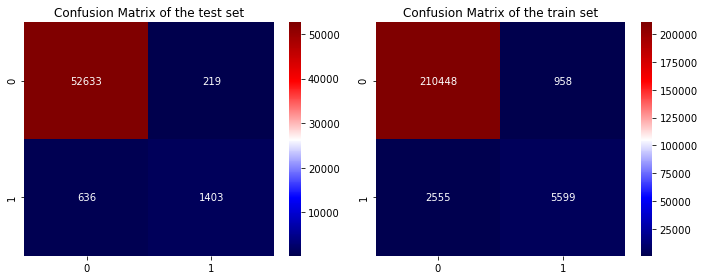

In [75]:
show_confusion_matrix(lg_clf)

### What can we learn from the heatmap? 
- We have predicted 636 inputs as not converting whereas they did convert
- We have predicted 219 values as converting whereasthey did not convert. Ideally we'd like to keep those numbers down



### Model rock curve

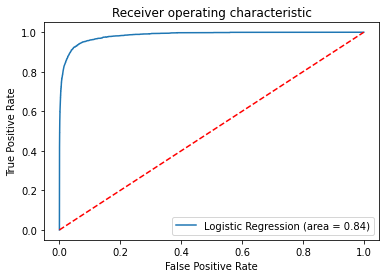

In [89]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lg_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lg_clf.predict_proba(X_test)[:,1]) 

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Let's play with 2 hyper parameters --> for time purposes we won't look at more
- C --> determines the regularisation strenghts, inversely correlated to it
- class_weight --> different weights given to our 0s and 1s. Perhaps useful here because there is an imbalance


In [77]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) 

parameters= {"C": np.logspace(-4, 4, 20), \
             "class_weight": [{1:0.67, 0:0.33}, {1:0.75, 0:0.25}, {1:0.8, 0:0.2}, "None", "balanced"], \
            }

model = LogisticRegression()
model_gs =GridSearchCV(model, parameters, cv=kfold, verbose=2, scoring="f1")
model_gs.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",model_gs.best_params_)
print("accuracy :",model_gs.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=0.0001, class_weight={1: 0.67, 0: 0.33} .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=0.0001, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] C=0.0001, class_weight={1: 0.67, 0: 0.33} .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ........ C=0.0001, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] C=0.0001, class_weight={1: 0.67, 0: 0.33} .......................
[CV] ........ C=0.0001, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] C=0.0001, class_weight={1: 0.67, 0: 0.33} .......................
[CV] ........ C=0.0001, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] C=0.0001, class_weight={1: 0.67, 0: 0.33} .......................
[CV] ........ C=0.0001, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] C=0.0001, class_weight={1: 0.75, 0: 0.25} .......................
[CV] ........ C=0.0001, class_weight={1: 0.75, 0: 0.25}, total=   0.4s
[CV] C=0.0001, class_weight={1: 0.75, 0: 0.25} .......................
[CV] ........ C=0.0001, class_weight={1: 0.75, 0: 0.25}, total=   0.4s
[CV] C=0.0001, class_weight={1: 0.75, 0: 0.25} .......................
[CV] ........ C=0.0001, class_weight={1: 0.75, 0: 0.25}, total=   0.4s
[CV] C=0.0001, class_weight={1: 0.75, 0: 0.25} .......................
[CV] .

[CV]  C=0.0006951927961775605, class_weight={1: 0.75, 0: 0.25}, total=   0.3s
[CV] C=0.0006951927961775605, class_weight={1: 0.75, 0: 0.25} ........
[CV]  C=0.0006951927961775605, class_weight={1: 0.75, 0: 0.25}, total=   0.4s
[CV] C=0.0006951927961775605, class_weight={1: 0.8, 0: 0.2} ..........
[CV]  C=0.0006951927961775605, class_weight={1: 0.8, 0: 0.2}, total=   0.3s
[CV] C=0.0006951927961775605, class_weight={1: 0.8, 0: 0.2} ..........
[CV]  C=0.0006951927961775605, class_weight={1: 0.8, 0: 0.2}, total=   0.3s
[CV] C=0.0006951927961775605, class_weight={1: 0.8, 0: 0.2} ..........
[CV]  C=0.0006951927961775605, class_weight={1: 0.8, 0: 0.2}, total=   0.3s
[CV] C=0.0006951927961775605, class_weight={1: 0.8, 0: 0.2} ..........
[CV]  C=0.0006951927961775605, class_weight={1: 0.8, 0: 0.2}, total=   0.4s
[CV] C=0.0006951927961775605, class_weight={1: 0.8, 0: 0.2} ..........
[CV]  C=0.0006951927961775605, class_weight={1: 0.8, 0: 0.2}, total=   0.3s
[CV] C=0.0006951927961775605, class_we

[CV] ........ C=0.004832930238571752, class_weight=None, total=   0.5s
[CV] C=0.004832930238571752, class_weight=None .......................
[CV] ........ C=0.004832930238571752, class_weight=None, total=   0.5s
[CV] C=0.004832930238571752, class_weight=None .......................
[CV] ........ C=0.004832930238571752, class_weight=None, total=   0.5s
[CV] C=0.004832930238571752, class_weight=None .......................
[CV] ........ C=0.004832930238571752, class_weight=None, total=   0.4s
[CV] C=0.004832930238571752, class_weight=None .......................
[CV] ........ C=0.004832930238571752, class_weight=None, total=   0.4s
[CV] C=0.004832930238571752, class_weight=balanced ...................
[CV] .... C=0.004832930238571752, class_weight=balanced, total=   0.5s
[CV] C=0.004832930238571752, class_weight=balanced ...................
[CV] .... C=0.004832930238571752, class_weight=balanced, total=   0.5s
[CV] C=0.004832930238571752, class_weight=balanced ...................
[CV] .

[CV] ..... C=0.03359818286283781, class_weight=balanced, total=   1.4s
[CV] C=0.03359818286283781, class_weight=balanced ....................
[CV] ..... C=0.03359818286283781, class_weight=balanced, total=   1.1s
[CV] C=0.03359818286283781, class_weight=balanced ....................
[CV] ..... C=0.03359818286283781, class_weight=balanced, total=   0.7s
[CV] C=0.08858667904100823, class_weight={1: 0.67, 0: 0.33} ..........
[CV]  C=0.08858667904100823, class_weight={1: 0.67, 0: 0.33}, total=   0.6s
[CV] C=0.08858667904100823, class_weight={1: 0.67, 0: 0.33} ..........
[CV]  C=0.08858667904100823, class_weight={1: 0.67, 0: 0.33}, total=   0.6s
[CV] C=0.08858667904100823, class_weight={1: 0.67, 0: 0.33} ..........
[CV]  C=0.08858667904100823, class_weight={1: 0.67, 0: 0.33}, total=   0.7s
[CV] C=0.08858667904100823, class_weight={1: 0.67, 0: 0.33} ..........
[CV]  C=0.08858667904100823, class_weight={1: 0.67, 0: 0.33}, total=   0.6s
[CV] C=0.08858667904100823, class_weight={1: 0.67, 0: 0.3

[CV]  C=0.615848211066026, class_weight={1: 0.67, 0: 0.33}, total=   0.6s
[CV] C=0.615848211066026, class_weight={1: 0.75, 0: 0.25} ............
[CV]  C=0.615848211066026, class_weight={1: 0.75, 0: 0.25}, total=   0.6s
[CV] C=0.615848211066026, class_weight={1: 0.75, 0: 0.25} ............
[CV]  C=0.615848211066026, class_weight={1: 0.75, 0: 0.25}, total=   0.5s
[CV] C=0.615848211066026, class_weight={1: 0.75, 0: 0.25} ............
[CV]  C=0.615848211066026, class_weight={1: 0.75, 0: 0.25}, total=   0.5s
[CV] C=0.615848211066026, class_weight={1: 0.75, 0: 0.25} ............
[CV]  C=0.615848211066026, class_weight={1: 0.75, 0: 0.25}, total=   0.5s
[CV] C=0.615848211066026, class_weight={1: 0.75, 0: 0.25} ............
[CV]  C=0.615848211066026, class_weight={1: 0.75, 0: 0.25}, total=   0.7s
[CV] C=0.615848211066026, class_weight={1: 0.8, 0: 0.2} ..............
[CV]  C=0.615848211066026, class_weight={1: 0.8, 0: 0.2}, total=   0.5s
[CV] C=0.615848211066026, class_weight={1: 0.8, 0: 0.2} ..

[CV]  C=4.281332398719396, class_weight={1: 0.8, 0: 0.2}, total=   0.6s
[CV] C=4.281332398719396, class_weight={1: 0.8, 0: 0.2} ..............
[CV]  C=4.281332398719396, class_weight={1: 0.8, 0: 0.2}, total=   0.5s
[CV] C=4.281332398719396, class_weight={1: 0.8, 0: 0.2} ..............
[CV]  C=4.281332398719396, class_weight={1: 0.8, 0: 0.2}, total=   0.7s
[CV] C=4.281332398719396, class_weight=None ..........................
[CV] ........... C=4.281332398719396, class_weight=None, total=   0.7s
[CV] C=4.281332398719396, class_weight=None ..........................
[CV] ........... C=4.281332398719396, class_weight=None, total=   0.5s
[CV] C=4.281332398719396, class_weight=None ..........................
[CV] ........... C=4.281332398719396, class_weight=None, total=   0.5s
[CV] C=4.281332398719396, class_weight=None ..........................
[CV] ........... C=4.281332398719396, class_weight=None, total=   0.5s
[CV] C=4.281332398719396, class_weight=None ..........................
[CV

[CV] .......... C=29.763514416313132, class_weight=None, total=   0.5s
[CV] C=29.763514416313132, class_weight=balanced .....................
[CV] ...... C=29.763514416313132, class_weight=balanced, total=   0.7s
[CV] C=29.763514416313132, class_weight=balanced .....................
[CV] ...... C=29.763514416313132, class_weight=balanced, total=   0.6s
[CV] C=29.763514416313132, class_weight=balanced .....................
[CV] ...... C=29.763514416313132, class_weight=balanced, total=   0.7s
[CV] C=29.763514416313132, class_weight=balanced .....................
[CV] ...... C=29.763514416313132, class_weight=balanced, total=   0.6s
[CV] C=29.763514416313132, class_weight=balanced .....................
[CV] ...... C=29.763514416313132, class_weight=balanced, total=   0.7s
[CV] C=78.47599703514607, class_weight={1: 0.67, 0: 0.33} ............
[CV]  C=78.47599703514607, class_weight={1: 0.67, 0: 0.33}, total=   0.6s
[CV] C=78.47599703514607, class_weight={1: 0.67, 0: 0.33} ............
[CV

[CV]  C=545.5594781168514, class_weight={1: 0.67, 0: 0.33}, total=   0.6s
[CV] C=545.5594781168514, class_weight={1: 0.67, 0: 0.33} ............
[CV]  C=545.5594781168514, class_weight={1: 0.67, 0: 0.33}, total=   0.6s
[CV] C=545.5594781168514, class_weight={1: 0.67, 0: 0.33} ............
[CV]  C=545.5594781168514, class_weight={1: 0.67, 0: 0.33}, total=   0.7s
[CV] C=545.5594781168514, class_weight={1: 0.75, 0: 0.25} ............
[CV]  C=545.5594781168514, class_weight={1: 0.75, 0: 0.25}, total=   0.7s
[CV] C=545.5594781168514, class_weight={1: 0.75, 0: 0.25} ............
[CV]  C=545.5594781168514, class_weight={1: 0.75, 0: 0.25}, total=   0.6s
[CV] C=545.5594781168514, class_weight={1: 0.75, 0: 0.25} ............
[CV]  C=545.5594781168514, class_weight={1: 0.75, 0: 0.25}, total=   0.7s
[CV] C=545.5594781168514, class_weight={1: 0.75, 0: 0.25} ............
[CV]  C=545.5594781168514, class_weight={1: 0.75, 0: 0.25}, total=   0.6s
[CV] C=545.5594781168514, class_weight={1: 0.75, 0: 0.25

[CV]  C=3792.690190732246, class_weight={1: 0.8, 0: 0.2}, total=   0.5s
[CV] C=3792.690190732246, class_weight={1: 0.8, 0: 0.2} ..............
[CV]  C=3792.690190732246, class_weight={1: 0.8, 0: 0.2}, total=   0.5s
[CV] C=3792.690190732246, class_weight={1: 0.8, 0: 0.2} ..............
[CV]  C=3792.690190732246, class_weight={1: 0.8, 0: 0.2}, total=   0.6s
[CV] C=3792.690190732246, class_weight={1: 0.8, 0: 0.2} ..............
[CV]  C=3792.690190732246, class_weight={1: 0.8, 0: 0.2}, total=   0.5s
[CV] C=3792.690190732246, class_weight={1: 0.8, 0: 0.2} ..............
[CV]  C=3792.690190732246, class_weight={1: 0.8, 0: 0.2}, total=   0.6s
[CV] C=3792.690190732246, class_weight=None ..........................
[CV] ........... C=3792.690190732246, class_weight=None, total=   0.6s
[CV] C=3792.690190732246, class_weight=None ..........................
[CV] ........... C=3792.690190732246, class_weight=None, total=   0.7s
[CV] C=3792.690190732246, class_weight=None ..........................
[

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  4.9min finished


tuned hpyerparameters :(best parameters)  {'C': 0.615848211066026, 'class_weight': {1: 0.67, 0: 0.33}}
accuracy : 0.765098308539899


In [78]:
lg_clf_gs = model_gs.best_estimator_

#### According to the GridSearch, hyperperameters of C=0.2335 and weighting conversions 3x times the weight of non conversions yield slightly better results. 
#### However, considering the range of results we got from the standard model in the previous cross validation, this improvement is minimal

In [79]:
print_scores(lg_clf_gs)

Scores for model on test set

Accuracy Score : 0.9834216902588767
Precision Score : 0.7812655705032386
Recall Score : 0.7690044139283962
F1 Score : 0.7750865051903113


Scores for model on train set

Accuracy Score : 0.9827108762980507
Precision Score : 0.7718991764412279
Recall Score : 0.7586460632818248
F1 Score : 0.7652152399802079


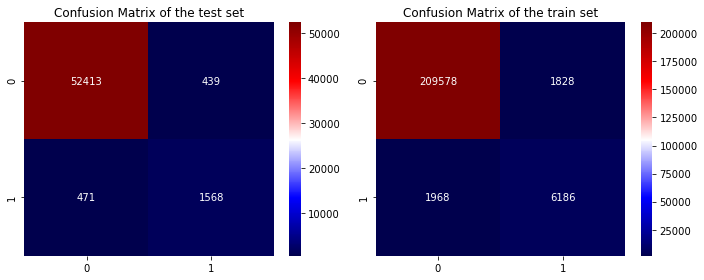

In [80]:
show_confusion_matrix(lg_clf_gs)

### What can we learn from the heatmap? 
- We have predicted 471 inputs as not converting whereas they did convert
- We have predicted 441 values as converting whereas they did not convert. 

Therefore, we could say that this model is actually worse than the one we had previously, because it predicts
more conversions, which is ,ore risky for the business ! 


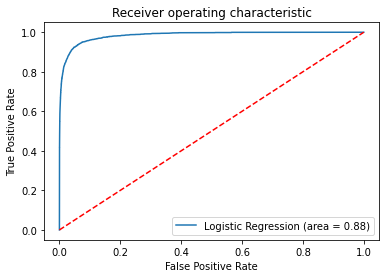

In [81]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lg_clf_gs.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lg_clf_gs.predict_proba(X_test)[:,1]) 

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#  Decision Tree and Random Forest 
- The Logistic Regression yields decent enough features, but let's see what happens if use a Decision Tree or a Random Forest

## Simple Decision Tree
- Let's try plotting a decision tree with the standard features

In [82]:
# creating model on data
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [83]:
# printing scores
print_scores(dt_clf)

Scores for model on test set

Accuracy Score : 0.9821282177406132
Precision Score : 0.8335435056746532
Recall Score : 0.6483570377636096
F1 Score : 0.7293793103448275


Scores for model on train set

Accuracy Score : 0.9864820550191292
Precision Score : 0.9041458852867831
Recall Score : 0.7114299730193769
F1 Score : 0.7962937542896362


In [84]:
# cross validation
cv = cross_val_score(dt_clf, X_train, y_train, cv=10, scoring= "f1")
print(cv)

[0.73233696 0.73916036 0.70571827 0.7431694  0.70233196 0.71944444
 0.71777476 0.73998642 0.75430145 0.73237509]


In [85]:
# avg and std for cv
avg = cv.mean()
std = cv.std()
print(avg)
print(std)

0.72865991055784
0.01598992499666884


#### A lot of overfitting here
#### Let's check out our confusion matrix

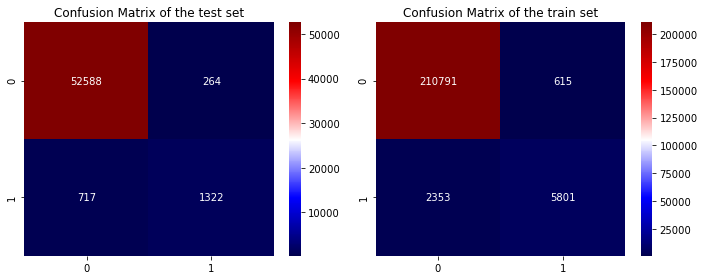

In [86]:
show_confusion_matrix(dt_clf)

#### We can also have a look at the classification report which looks at the scores per outcome

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred= dt_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     52852
           1       0.83      0.65      0.73      2039

    accuracy                           0.98     54891
   macro avg       0.91      0.82      0.86     54891
weighted avg       0.98      0.98      0.98     54891



#### Seems like our tree is very good at classifying the 0s, but not so good with the ones. 
#### Let's see if we can do better by playing with the hyper parameters in a Grid Search

##  RandomSearch Decision Tree
- Let's try making a random search on the hyper parameters of the decision tree
- We can play with the following features:
    - criterion: the measure to define the quality fo the split. We will only use gini
    - max_depth: maximum depth of a tree --> determines how many divisions we want ot make
    - min_samples_split: what is the minimum number of samples we want to reach before stoping to split nodes
    - min_samples_leaf = The minimum number of samples required to be at a leaf node.
    - class_weight = weight given to each class
#### For the purpose we will do a randomized search with 500 iterations

In [126]:
# Random search cross validation
from sklearn.model_selection import RandomizedSearchCV

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0) 

parameters= {"criterion": ["gini"], \
             "class_weight": [{1:0.67, 0:0.33}, {1:0.75, 0:0.25}, {1:0.8, 0:0.2}, "None", "balanced"], \
            "max_depth": range(5,50) , \
            "min_samples_leaf" : range(5,50), \
            "min_samples_split" : [2, 5, 10, 20, 30]}

model = DecisionTreeClassifier()
model_rs =RandomizedSearchCV(model, parameters, cv=kfold, verbose=2, scoring="f1", n_iter=100)
model_rs.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] min_samples_split=20, min_samples_leaf=22, max_depth=38, criterion=gini, class_weight={1: 0.8, 0: 0.2} 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_split=20, min_samples_leaf=22, max_depth=38, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=   0.5s
[CV] min_samples_split=20, min_samples_leaf=22, max_depth=38, criterion=gini, class_weight={1: 0.8, 0: 0.2} 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  min_samples_split=20, min_samples_leaf=22, max_depth=38, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=   0.5s
[CV] min_samples_split=20, min_samples_leaf=22, max_depth=38, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=20, min_samples_leaf=22, max_depth=38, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=   0.4s
[CV] min_samples_split=20, min_samples_leaf=5, max_depth=48, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=20, min_samples_leaf=5, max_depth=48, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=20, min_samples_leaf=5, max_depth=48, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=20, min_samples_leaf=5, max_depth=48, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=20, min_samples_leaf=5, max_depth=48, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=20, min_samples_leaf=5, max_depth=48, c

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=5, min_samples_leaf=12, max_depth=32, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=5, min_samples_leaf=12, max_depth=32, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=5, min_samples_leaf=12, max_depth=32, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.5s
[CV] min_samples_split=5, min_samples_leaf=12, max_depth=32, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=5, min_samples_leaf=12, max_depth=32, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=10, min_samples_leaf=44, max_depth=15, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=10, min_samples_leaf=44, max_depth=15, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=   0.4s
[CV] min_samples_split=10, min_samples_leaf=44, max_depth=15, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=10, min_samples_leaf=44, max_depth=15, 

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=5, min_samples_leaf=9, max_depth=22, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.5s
[CV] min_samples_split=5, min_samples_leaf=9, max_depth=22, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=5, min_samples_leaf=9, max_depth=22, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=5, min_samples_leaf=9, max_depth=22, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=5, min_samples_leaf=9, max_depth=22, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=20, min_samples_leaf=37, max_depth=18, criterion=gini, class_weight=None 
[CV]  min_samples_split=20, min_samples_leaf=37, max_depth=18, criterion=gini, class_weight=None, total=   0.0s
[CV] min_samples_split=20, min_samples_leaf=37, max_depth=18, criterion=gini, class_weight=None 
[CV]  min_samples_split=20, min_samples_leaf=37, max_depth=18, criterion=gini, class_weight=None, total=

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=30, min_samples_leaf=42, max_depth=36, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=   0.4s
[CV] min_samples_split=30, min_samples_leaf=42, max_depth=36, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=30, min_samples_leaf=42, max_depth=36, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=   0.4s
[CV] min_samples_split=30, min_samples_leaf=42, max_depth=36, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=30, min_samples_leaf=42, max_depth=36, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=   0.4s
[CV] min_samples_split=5, min_samples_leaf=39, max_depth=9, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=5, min_samples_leaf=39, max_depth=9, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=   0.4s
[CV] min_samples_split=5, min_samples_leaf=39, max_depth=9, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=5, min_samples_leaf=39, max_depth=9, cri

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=10, min_samples_leaf=8, max_depth=13, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=   0.3s
[CV] min_samples_split=10, min_samples_leaf=8, max_depth=13, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=10, min_samples_leaf=8, max_depth=13, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=   0.4s
[CV] min_samples_split=10, min_samples_leaf=8, max_depth=13, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=10, min_samples_leaf=8, max_depth=13, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=   0.4s
[CV] min_samples_split=2, min_samples_leaf=41, max_depth=37, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=2, min_samples_leaf=41, max_depth=37, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=2, min_samples_leaf=41, max_depth=37, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=2, min_samples_leaf=41, max_depth=37

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=20, min_samples_leaf=22, max_depth=12, criterion=gini, class_weight=balanced, total=   0.3s
[CV] min_samples_split=20, min_samples_leaf=22, max_depth=12, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=20, min_samples_leaf=22, max_depth=12, criterion=gini, class_weight=balanced, total=   0.4s
[CV] min_samples_split=20, min_samples_leaf=22, max_depth=12, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=20, min_samples_leaf=22, max_depth=12, criterion=gini, class_weight=balanced, total=   0.3s
[CV] min_samples_split=10, min_samples_leaf=36, max_depth=9, criterion=gini, class_weight=None 
[CV]  min_samples_split=10, min_samples_leaf=36, max_depth=9, criterion=gini, class_weight=None, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=36, max_depth=9, criterion=gini, class_weight=None 
[CV]  min_samples_split=10, min_samples_leaf=36, max_depth=9, criterion=gini, class_weight=None, total=   0.0s
[CV] min_samples_split=10, min_sampl

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=5, min_samples_leaf=41, max_depth=49, criterion=gini, class_weight=balanced, total=   0.4s
[CV] min_samples_split=5, min_samples_leaf=41, max_depth=49, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=5, min_samples_leaf=41, max_depth=49, criterion=gini, class_weight=balanced, total=   0.4s
[CV] min_samples_split=5, min_samples_leaf=41, max_depth=49, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=5, min_samples_leaf=41, max_depth=49, criterion=gini, class_weight=balanced, total=   0.7s
[CV] min_samples_split=30, min_samples_leaf=7, max_depth=48, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=30, min_samples_leaf=7, max_depth=48, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=   0.8s
[CV] min_samples_split=30, min_samples_leaf=7, max_depth=48, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=30, min_samples_leaf=7, max_depth=48, criterion=gini, class_weight={1: 0.75, 0: 0.25},

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=2, min_samples_leaf=12, max_depth=48, criterion=gini, class_weight=balanced, total=   0.3s
[CV] min_samples_split=2, min_samples_leaf=12, max_depth=48, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=2, min_samples_leaf=12, max_depth=48, criterion=gini, class_weight=balanced, total=   0.4s
[CV] min_samples_split=2, min_samples_leaf=12, max_depth=48, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=2, min_samples_leaf=12, max_depth=48, criterion=gini, class_weight=balanced, total=   0.3s
[CV] min_samples_split=20, min_samples_leaf=42, max_depth=18, criterion=gini, class_weight=None 
[CV]  min_samples_split=20, min_samples_leaf=42, max_depth=18, criterion=gini, class_weight=None, total=   0.0s
[CV] min_samples_split=20, min_samples_leaf=42, max_depth=18, criterion=gini, class_weight=None 
[CV]  min_samples_split=20, min_samples_leaf=42, max_depth=18, criterion=gini, class_weight=None, total=   0.0s
[CV] min_samples_split=20, min_sample

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=10, min_samples_leaf=9, max_depth=13, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=10, min_samples_leaf=9, max_depth=13, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=10, min_samples_leaf=9, max_depth=13, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.5s
[CV] min_samples_split=10, min_samples_leaf=9, max_depth=13, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=10, min_samples_leaf=9, max_depth=13, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.5s
[CV] min_samples_split=20, min_samples_leaf=18, max_depth=14, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=20, min_samples_leaf=18, max_depth=14, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=   0.5s
[CV] min_samples_split=20, min_samples_leaf=18, max_depth=14, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=20, min_samples_leaf=18, max_dept

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=5, min_samples_leaf=15, max_depth=5, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=   0.3s
[CV] min_samples_split=5, min_samples_leaf=15, max_depth=5, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=5, min_samples_leaf=15, max_depth=5, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=   0.2s
[CV] min_samples_split=5, min_samples_leaf=15, max_depth=5, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=5, min_samples_leaf=15, max_depth=5, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=   0.2s
[CV] min_samples_split=5, min_samples_leaf=6, max_depth=10, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=5, min_samples_leaf=6, max_depth=10, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=5, min_samples_leaf=6, max_depth=10, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=5, min_samples_leaf=6, max_depth=10, criteri

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=2, min_samples_leaf=42, max_depth=28, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=   0.4s
[CV] min_samples_split=2, min_samples_leaf=42, max_depth=28, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=2, min_samples_leaf=42, max_depth=28, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=   0.4s
[CV] min_samples_split=2, min_samples_leaf=42, max_depth=28, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=2, min_samples_leaf=42, max_depth=28, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=   0.3s
[CV] min_samples_split=10, min_samples_leaf=20, max_depth=25, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=10, min_samples_leaf=20, max_depth=25, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=   0.3s
[CV] min_samples_split=10, min_samples_leaf=20, max_depth=25, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=10, min_samples_leaf=20, max_depth=25, 

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=2, min_samples_leaf=22, max_depth=20, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=2, min_samples_leaf=22, max_depth=20, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=2, min_samples_leaf=22, max_depth=20, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=2, min_samples_leaf=22, max_depth=20, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=2, min_samples_leaf=22, max_depth=20, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=20, min_samples_leaf=17, max_depth=31, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=20, min_samples_leaf=17, max_depth=31, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=20, min_samples_leaf=17, max_depth=31, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=20, min_samples_leaf=17, max_dept

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=10, min_samples_leaf=13, max_depth=13, criterion=gini, class_weight=balanced, total=   0.3s
[CV] min_samples_split=10, min_samples_leaf=13, max_depth=13, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=10, min_samples_leaf=13, max_depth=13, criterion=gini, class_weight=balanced, total=   0.3s
[CV] min_samples_split=10, min_samples_leaf=13, max_depth=13, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=10, min_samples_leaf=13, max_depth=13, criterion=gini, class_weight=balanced, total=   0.3s
[CV] min_samples_split=2, min_samples_leaf=38, max_depth=14, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=2, min_samples_leaf=38, max_depth=14, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=2, min_samples_leaf=38, max_depth=14, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=2, min_samples_leaf=38, max_depth=14, criterion=gini, class_weight={1: 0.67, 0: 0

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=5, min_samples_leaf=41, max_depth=22, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=5, min_samples_leaf=41, max_depth=22, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=5, min_samples_leaf=41, max_depth=22, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=5, min_samples_leaf=41, max_depth=22, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=5, min_samples_leaf=41, max_depth=22, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=2, min_samples_leaf=15, max_depth=29, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=2, min_samples_leaf=15, max_depth=29, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=   0.3s
[CV] min_samples_split=2, min_samples_leaf=15, max_depth=29, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=2, min_samples_leaf=15, max_depth=29, crit

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=30, min_samples_leaf=8, max_depth=14, criterion=gini, class_weight=balanced, total=   0.3s
[CV] min_samples_split=30, min_samples_leaf=8, max_depth=14, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=30, min_samples_leaf=8, max_depth=14, criterion=gini, class_weight=balanced, total=   0.3s
[CV] min_samples_split=30, min_samples_leaf=8, max_depth=14, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=30, min_samples_leaf=8, max_depth=14, criterion=gini, class_weight=balanced, total=   0.3s
[CV] min_samples_split=5, min_samples_leaf=7, max_depth=6, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=5, min_samples_leaf=7, max_depth=6, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.3s
[CV] min_samples_split=5, min_samples_leaf=7, max_depth=6, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=5, min_samples_leaf=7, max_depth=6, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total= 

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=10, min_samples_leaf=48, max_depth=31, criterion=gini, class_weight=balanced, total=   0.4s
[CV] min_samples_split=10, min_samples_leaf=48, max_depth=31, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=10, min_samples_leaf=48, max_depth=31, criterion=gini, class_weight=balanced, total=   0.3s
[CV] min_samples_split=10, min_samples_leaf=48, max_depth=31, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=10, min_samples_leaf=48, max_depth=31, criterion=gini, class_weight=balanced, total=   0.3s
[CV] min_samples_split=5, min_samples_leaf=44, max_depth=25, criterion=gini, class_weight=None 
[CV]  min_samples_split=5, min_samples_leaf=44, max_depth=25, criterion=gini, class_weight=None, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=44, max_depth=25, criterion=gini, class_weight=None 
[CV]  min_samples_split=5, min_samples_leaf=44, max_depth=25, criterion=gini, class_weight=None, total=   0.0s
[CV] min_samples_split=5, min_sample

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=20, min_samples_leaf=35, max_depth=34, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=   0.4s
[CV] min_samples_split=20, min_samples_leaf=35, max_depth=34, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=20, min_samples_leaf=35, max_depth=34, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=   0.4s
[CV] min_samples_split=20, min_samples_leaf=35, max_depth=34, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=20, min_samples_leaf=35, max_depth=34, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=   0.3s
[CV] min_samples_split=10, min_samples_leaf=19, max_depth=10, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=10, min_samples_leaf=19, max_depth=10, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=10, min_samples_leaf=19, max_depth=10, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=10, min_samples_leaf=19, max_depth=10,

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=20, min_samples_leaf=35, max_depth=21, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=20, min_samples_leaf=35, max_depth=21, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=20, min_samples_leaf=35, max_depth=21, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=20, min_samples_leaf=35, max_depth=21, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=20, min_samples_leaf=35, max_depth=21, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=5, min_samples_leaf=38, max_depth=43, criterion=gini, class_weight=None 
[CV]  min_samples_split=5, min_samples_leaf=38, max_depth=43, criterion=gini, class_weight=None, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=38, max_depth=43, criterion=gini, class_weight=None 
[CV]  min_samples_split=5, min_samples_leaf=38, max_depth=43, criterion=gini, class_weight=None, 

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=20, min_samples_leaf=17, max_depth=37, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=20, min_samples_leaf=17, max_depth=37, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=20, min_samples_leaf=17, max_depth=37, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=20, min_samples_leaf=17, max_depth=37, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=20, min_samples_leaf=17, max_depth=37, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=2, min_samples_leaf=19, max_depth=17, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=2, min_samples_leaf=19, max_depth=17, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=   0.4s
[CV] min_samples_split=2, min_samples_leaf=19, max_depth=17, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=2, min_samples_leaf=19, max_dep

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=20, min_samples_leaf=34, max_depth=35, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=20, min_samples_leaf=34, max_depth=35, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=20, min_samples_leaf=34, max_depth=35, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=20, min_samples_leaf=34, max_depth=35, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=20, min_samples_leaf=34, max_depth=35, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   0.4s
[CV] min_samples_split=5, min_samples_leaf=31, max_depth=45, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=5, min_samples_leaf=31, max_depth=45, criterion=gini, class_weight=balanced, total=   0.3s
[CV] min_samples_split=5, min_samples_leaf=31, max_depth=45, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=5, min_samples_leaf=31, max_depth=45, criterion=gini, class_w

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'class_weight': [{0: 0.33, 1: 0.67},
                                                         {0: 0.25, 1: 0.75},
                                                         {0: 0.2, 1: 0.8},
                                                         'None', 'balanced'],
                                        'criterion': ['gini'],
                                        'max_depth': range(5, 50),
                                        'min_samples_leaf': range(5, 50),
                                        'min_samples_split': [2, 5, 10, 20,
                                                              30]},
                   scoring='f1', verbose=2)

In [91]:
print("tuned hpyerparameters :(best parameters) ", model_rs.best_params_)
print("accuracy :",model_rs.best_score_)

tuned hpyerparameters :(best parameters)  {'min_samples_split': 5, 'min_samples_leaf': 28, 'max_depth': 8, 'criterion': 'gini', 'class_weight': {1: 0.67, 0: 0.33}}
accuracy : 0.7499207996442111


In [92]:
dt_clf_rs = model_rs.best_estimator_

In [93]:
print_scores(dt_clf_rs)

Scores for model on test set

Accuracy Score : 0.9826201016560092
Precision Score : 0.7708437343984024
Recall Score : 0.7572339382050024
F1 Score : 0.7639782285997031


Scores for model on train set

Accuracy Score : 0.9822463108034251
Precision Score : 0.7632360217714003
Recall Score : 0.7566838361540348
F1 Score : 0.7599458061337603


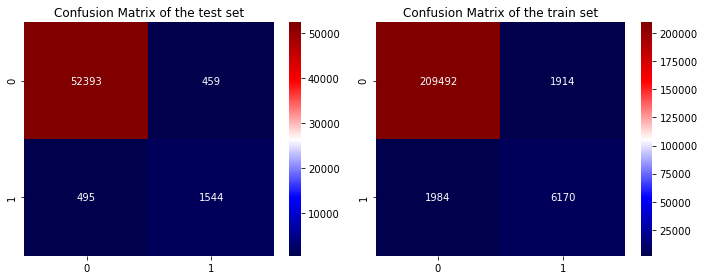

In [94]:
show_confusion_matrix(dt_clf_rs)

In [95]:
print(classification_report(y_true=y_test, y_pred=dt_clf_rs.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     52852
           1       0.77      0.76      0.76      2039

    accuracy                           0.98     54891
   macro avg       0.88      0.87      0.88     54891
weighted avg       0.98      0.98      0.98     54891



#### Conclusion 
- The decision tree does not yield better results than the LG, even when we try to optimize the hyper-parameters
- Our baseline model is still the best

#  Random Forest 
- Let's try making a random forest and see if the model performs better
- Again, we will use a random grid cross validation in order to save time 
    

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
# Random search random forest CV

kfold = StratifiedKFold(n_splits = 3, shuffle=True, random_state=0) 

parameters= {"criterion": ["gini"], \
             "class_weight": [{1:0.67, 0:0.33}, {1:0.75, 0:0.25}, {1:0.8, 0:0.2}, "None", "balanced"], \
            "max_depth": range(5,50) , \
            "min_samples_leaf" : range(5,50), \
            "min_samples_split" : [2, 5, 10, 20, 30], \
            "n_estimators" : [10, 50, 100, 200]}

model = RandomForestClassifier()
model_rs =RandomizedSearchCV(model, parameters, cv=kfold, verbose=2, scoring="f1", n_iter=10)
model_rs.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=50, min_samples_split=30, min_samples_leaf=23, max_depth=24, criterion=gini, class_weight={1: 0.67, 0: 0.33} 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, min_samples_split=30, min_samples_leaf=23, max_depth=24, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   7.2s
[CV] n_estimators=50, min_samples_split=30, min_samples_leaf=23, max_depth=24, criterion=gini, class_weight={1: 0.67, 0: 0.33} 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=30, min_samples_leaf=23, max_depth=24, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   6.0s
[CV] n_estimators=50, min_samples_split=30, min_samples_leaf=23, max_depth=24, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  n_estimators=50, min_samples_split=30, min_samples_leaf=23, max_depth=24, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   7.2s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=39, max_depth=13, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=39, max_depth=13, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=   5.8s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=39, max_depth=13, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=39, max_depth=13, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=   7.7s
[CV] n_estimators=50, min_samples_split=5, min_s

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 330, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 581, in _validate_y_class_weight
    raise ValueError('Valid presets for class_weight include '
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "None".

  warnings.warn("Estimator fit failed. The score on this train-test"
/Us

[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=38, max_depth=18, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=  13.5s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=38, max_depth=18, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=38, max_depth=18, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=  11.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=38, max_depth=18, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=38, max_depth=18, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=  11.3s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=30, max_depth=48, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=30, max_depth=48, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=   1.2s
[CV] n_estimators=10, min_samples_split=5, mi

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 330, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 581, in _validate_y_class_weight
    raise ValueError('Valid presets for class_weight include '
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "None".

  warnings.warn("Estimator fit failed. The score on this train-test"
/Us

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=RandomForestClassifier(),
                   param_distributions={'class_weight': [{0: 0.33, 1: 0.67},
                                                         {0: 0.25, 1: 0.75},
                                                         {0: 0.2, 1: 0.8},
                                                         'None', 'balanced'],
                                        'criterion': ['gini'],
                                        'max_depth': range(5, 50),
                                        'min_samples_leaf': range(5, 50),
                                        'min_samples_split': [2, 5, 10, 20, 30],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1', verbose=2)

In [98]:
# print best hyperparameters
print("tuned hpyerparameters :(best parameters) ", model_rs.best_params_)
print("accuracy :",model_rs.best_score_)

tuned hpyerparameters :(best parameters)  {'n_estimators': 50, 'min_samples_split': 30, 'min_samples_leaf': 23, 'max_depth': 24, 'criterion': 'gini', 'class_weight': {1: 0.67, 0: 0.33}}
accuracy : 0.7603316294243999


In [99]:
# storing_best_estimator
rf_clf_rs = model_rs.best_estimator_

In [100]:
print_scores(rf_clf_rs)

Scores for model on test set

Accuracy Score : 0.9832395110309522
Precision Score : 0.7841543930929405
Recall Score : 0.7572339382050024
F1 Score : 0.7704590818363274


Scores for model on train set

Accuracy Score : 0.9830843505192203
Precision Score : 0.7812262477831264
Recall Score : 0.7563159185675742
F1 Score : 0.7685692921236292


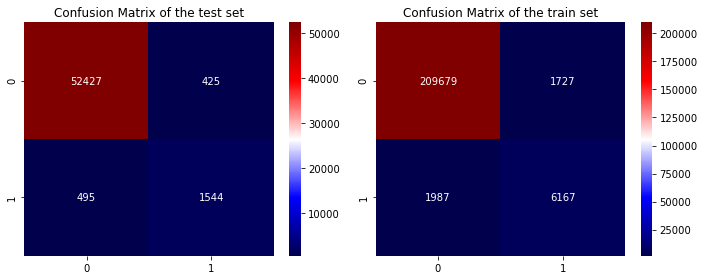

In [101]:
show_confusion_matrix(rf_clf_rs)

####  Conclusion 
- The random forest yields similar results to the LG, even when we try to optimize the hyper-parameters
- Our baseline model is still as good as the others

#  SVM 
- Let's see if a support vector machine model can help us with this problem 
- SVMs are known to help out when there is a big imbalance in the distribution of output values, which is the case here
    

In [103]:
from sklearn.svm import SVC

In [104]:
### we know which hyper parameters perform better. Won't do gridsearch here as it takes too long
svc_clf = SVC(gamma = 1, C = 100)
svc_clf.fit(X_train, y_train)

SVC(C=100, gamma=1)

In [106]:
print_scores(svc_clf)

Scores for model on test set

Accuracy Score : 0.9839135741742726
Precision Score : 0.8590062111801242
Recall Score : 0.678273663560569
F1 Score : 0.7580158947656892


Scores for model on train set

Accuracy Score : 0.9844552741847331
Precision Score : 0.8676903986350241
Recall Score : 0.6860436595535934
F1 Score : 0.7662488870625299


####  Conclusion 
- The SVC  yields similar results to the LG, even when we try to optimize the hyper-parameters
- Our baseline model is still as good as the others

#  Stacking and Voting  Classifiers 
- All of our classifiers show roughly the same scores on the dataset
- Let's see if we can improve further using the stacking method

## Stacking classifier

In [108]:
from sklearn.ensemble import StackingClassifier

In [109]:
st = StackingClassifier(estimators=[("tree", dt_clf_rs ),
    ("random forest",rf_clf_rs),
    ("logreg",lg_clf_gs),
    ("svc", svc_clf)])

In [110]:
## plotting predictions of each model
first_order_pred = pd.DataFrame(st.fit_transform(X_train,y_train), columns=st.named_estimators_.keys())
first_order_pred


,tree,random forest,logreg,svc
0,0.000234,0.000000,0.000228,-1.028783
1,0.000752,0.000000,0.000196,-1.240281
2,0.000234,0.000000,0.000022,-1.151131
3,0.000854,0.000000,0.001959,-1.000212
4,0.000234,0.000000,0.000816,-1.043879
...,...,...,...,...
219555,0.118521,0.169028,0.062341,-1.000990
219556,0.085366,0.077794,0.115794,-1.000731
219557,0.003916,0.000000,0.000245,-1.224211
219558,0.003106,0.000000,0.000223,-1.144778


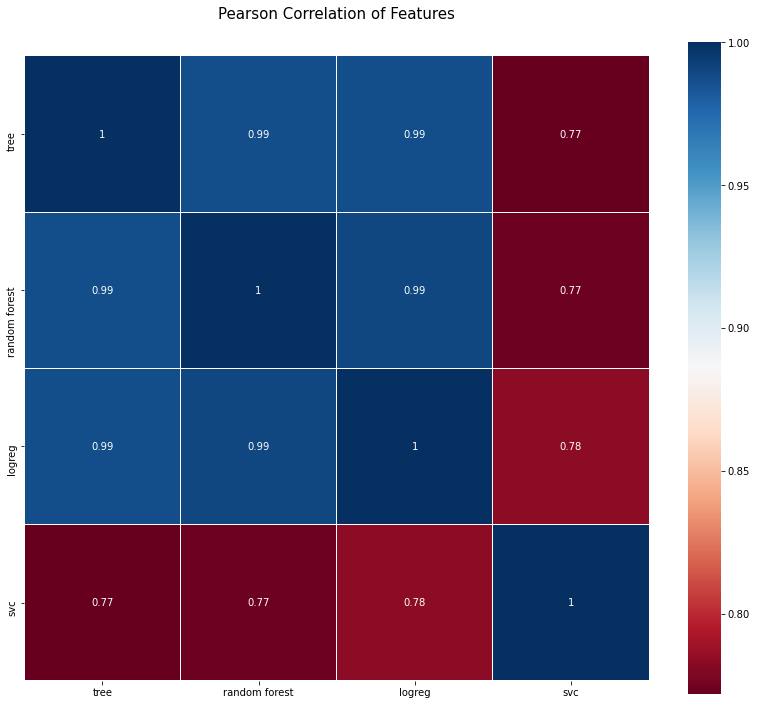

In [111]:
## correlation matrix of predictions
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(pd.DataFrame(first_order_pred).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

- The SVM since to have somewhat different results than the others, maybe stacking or voting could help improve the efficiency of our model

In [112]:
st.fit(X_train, y_train)

StackingClassifier(estimators=[('tree',
                                DecisionTreeClassifier(class_weight={0: 0.33,
                                                                     1: 0.67},
                                                       max_depth=8,
                                                       min_samples_leaf=28,
                                                       min_samples_split=5)),
                               ('random forest',
                                RandomForestClassifier(class_weight={0: 0.33,
                                                                     1: 0.67},
                                                       max_depth=24,
                                                       min_samples_leaf=23,
                                                       min_samples_split=30,
                                                       n_estimators=50)),
                               ('logreg',
                                Logis

In [113]:
print_scores(st)

Scores for model on test set

Accuracy Score : 0.9843508043212913
Precision Score : 0.8329571106094809
Recall Score : 0.7238842569887199
F1 Score : 0.7745998425610077


Scores for model on train set

Accuracy Score : 0.9838677354709419
Precision Score : 0.8241495642395277
Recall Score : 0.7190336031395634
F1 Score : 0.7680115273775217


#### Conclusion
- Even stacked, the models yield similar results to the LG
- Our baseline model is still as good as the others

## Voting classifier

In [123]:
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[("tree", dt_clf_rs ),\
    ("random forest",rf_clf_rs),\
    ("logreg",lg_clf_gs),\
    ("svc", SVC(C=100, gamma=1, probability=True))], \
    voting='soft')

votingC = votingC.fit(X_train,y_train)

In [125]:
print_scores(votingC)

Scores for model on test set

Accuracy Score : 0.9843872401668762
Precision Score : 0.8488783943329398
Recall Score : 0.7052476704266798
F1 Score : 0.7704259308866864


Scores for model on train set

Accuracy Score : 0.9842275460010931
Precision Score : 0.8431602048280907
Recall Score : 0.7067696835908757
F1 Score : 0.7689639068650342


####  Conclusion 
- Even with a voting classifier, the models yield similar results to the LG
- Our baseline model is still as good as the others

# Conclusion

#### - It was hinted from early on that our LogReg model would suffice for the predictions --> scores varied little after cross validation, and other models yielded similar scores
#### - The purpose of this exercise was to practice data visualiation and different machine learning classification techniques 
#### - Perhaps the model could be further optimized with longer gridsearches, but the small increase would not be worth the processing time